# pynq直接使得由vitis libray example 生成的xclbin  

## vitis libray example vivado 硬件设计图
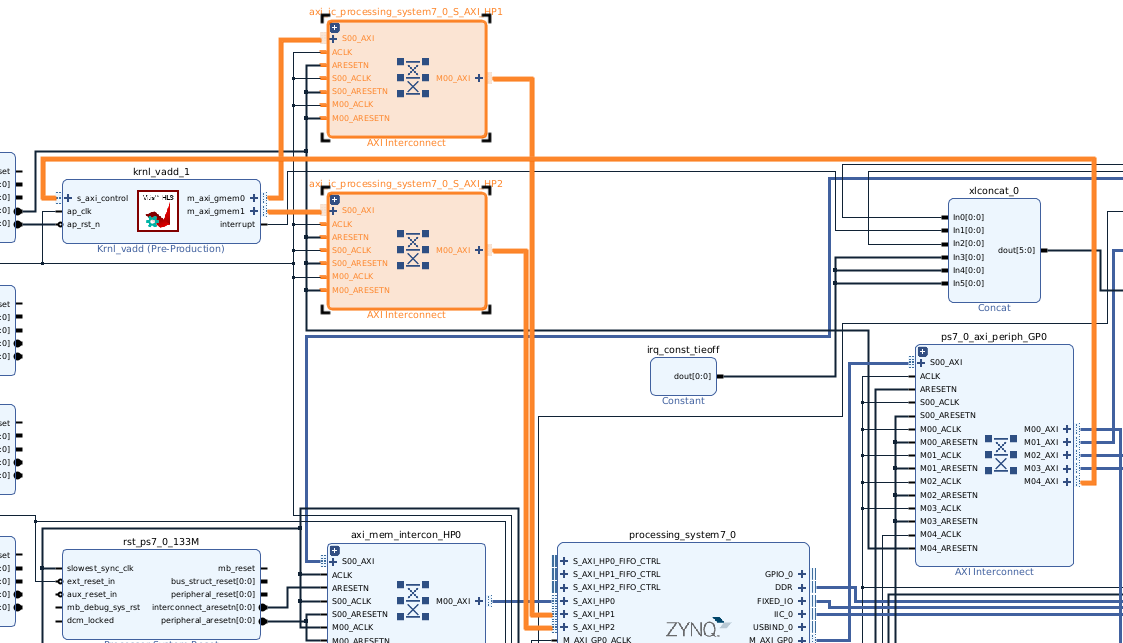
## kernel 使得m_axi 直接访问ps的DDR内存数据
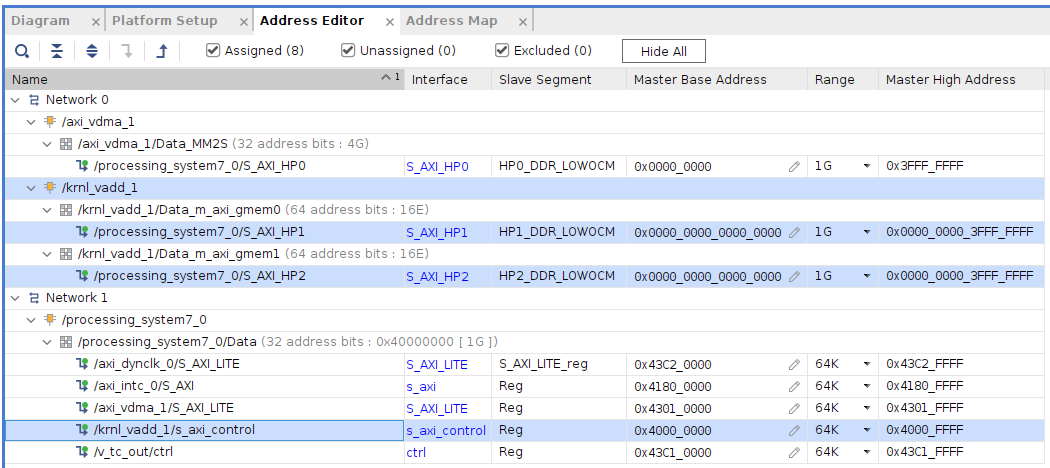
## kernel adder的数据流
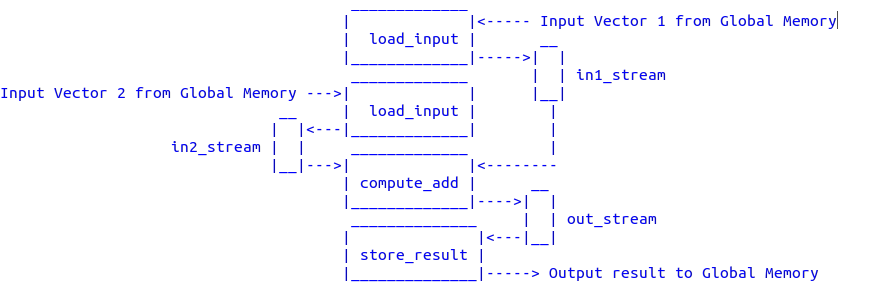
## kernel adder 函数原型
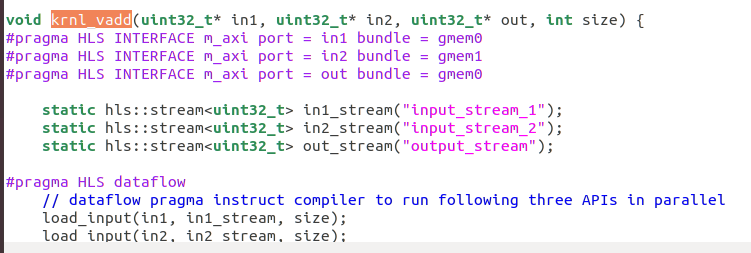
## kernel adder 控制寄存器 
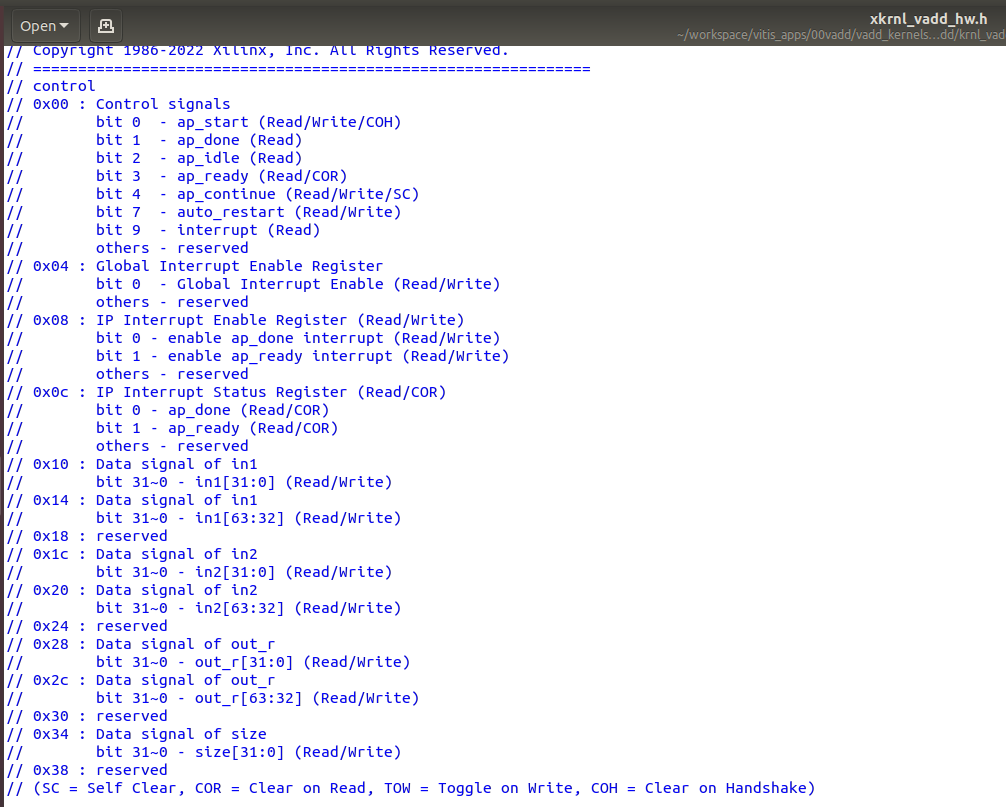

In [1]:
from pynq import Overlay

In [2]:
ol = Overlay('./overlay/binary_container_1.xclbin')

In [3]:
# ol.ip_dict

{'krnl_vadd_1': {'phys_addr': 1073741824,
  'addr_range': 60,
  'type': 'xilinx.com:hls:krnl_vadd:1.0',
  'hw_control_protocol': 'ap_ctrl_chain',
  'fullpath': 'krnl_vadd_1',
  'registers': {'CTRL': {'address_offset': 0,
    'access': 'read-write',
    'size': 4,
    'description': 'OpenCL Control Register',
    'type': 'unsigned int',
    'id': None,
    'fields': {'AP_START': {'access': 'read-write',
      'bit_offset': 0,
      'bit_width': 1,
      'description': 'Start the accelerator'},
     'AP_DONE': {'access': 'read-only',
      'bit_offset': 1,
      'bit_width': 1,
      'description': 'Accelerator has finished - cleared on read'},
     'AP_IDLE': {'access': 'read-only',
      'bit_offset': 2,
      'bit_width': 1,
      'description': 'Accelerator is idle'},
     'AP_READY': {'access': 'read-only',
      'bit_offset': 3,
      'bit_width': 1,
      'description': 'Accelerator is ready to start next computation'},
     'AUTO_RESTART': {'access': 'read-write',
      'bit_offs

In [4]:
krnl_vadd = ol.krnl_vadd_1 # 不能使用 ol.ip_dict['krnl_vadd_1']

In [5]:
# krnl_vadd.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, AUTO_RESTART=0, AP_CONTINUE=0),
  in1 = Register(value=0),
  in2 = Register(value=0),
  out_r = Register(value=0),
  size = Register(value=0)
}

In [6]:
from pynq import allocate
import numpy as np 
data_length = 4096
py_buffer_a = allocate(shape=(data_length,), dtype=np.int32)
py_buffer_b = allocate(shape=(data_length,), dtype=np.int32)
py_buffer_result = allocate(shape=(data_length,), dtype=np.int32)

In [7]:
for i in range(10):
    py_buffer_a[i] = i
    py_buffer_b[i] = i

In [8]:
krnl_vadd.register_map.in1 = py_buffer_a.physical_address
krnl_vadd.register_map.in2 = py_buffer_b.physical_address
krnl_vadd.register_map.out_r = py_buffer_result.physical_address
krnl_vadd.register_map.size = data_length

In [9]:
krnl_vadd.register_map.CTRL.AP_DONE

0

In [10]:
krnl_vadd.register_map.CTRL.AP_START=1

In [11]:
krnl_vadd.register_map.CTRL.AP_DONE

1

In [12]:
py_buffer_result

PynqBuffer([0, 2, 4, ..., 0, 0, 0])